Importing The Required Libraries

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [10]:
img_w = img_h = 28

Loading The data

---


Data obtained from: https://drive.google.com/file/d/1fLwAKiesZisxO6rGfhRN3i0vJpqlETLn/view

In [4]:
data = pd.read_csv("/content/train.csv")

Analysing the data

In [8]:
data.head(10)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   
5      0       0       0       0       0       0       0       0       0   
6      7       0       0       0       0       0       0       0       0   
7      3       0       0       0       0       0       0       0       0   
8      5       0       0       0       0       0       0       0       0   
9      3       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
1       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
2       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
3       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
4       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
5       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
6       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
7       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
8       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   
9       0  ...       0.0       0.0       0.0       0.0       0.0       0.0   

   pixel780  pixel781  pixel782  pixel783  
0       0.0       0.0       0.0       0.0  
1       0.0       0.0       0.0       0.0  
2       0.0       0.0       0.0       0.0  
3       0.0       0.0       0.0       0.0  
4       0.0       0.0       0.0       0.0  
5       0.0       0.0       0.0       0.0  
6       0.0       0.0       0.0       0.0  
7       0.0       0.0       0.0       0.0  
8       0.0       0.0       0.0       0.0  
9       0.0       0.0       0.0       0.0  

[10 rows x 785 columns]

In [5]:
data.shape

(4011, 785)

In [7]:
flattened_labels = data.iloc[:,0].values
flattened_labels[:10]

array([1, 0, 1, 4, 0, 0, 7, 3, 5, 3])

Reshaped data Analysis

In [9]:
images = data.iloc[:,1:].values
images = images.astype(np.float32)

In [11]:
def display(i):
  reshaped_img = images[i].reshape(img_w,img_h)
  plt.title(flattened_labels[i])
  plt.imshow(reshaped_img, cmap= plt.cm.binary)
  plt.axis("off")
  plt.show()

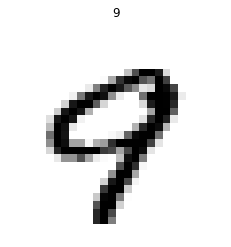

In [12]:
display(100)

Apply One Hot Encoding

In [16]:
one_hot_enc = OneHotEncoder(sparse=False)
enc = flattened_labels.reshape(len(flattened_labels),1)
labels = one_hot_enc.fit_transform(enc)
labels = labels.astype(np.uint8)

In [22]:
print(str(flattened_labels[50])+" is encoded as"+": "+str(labels[50]))
print(str(flattened_labels[10])+" is encoded as"+": "+str(labels[10]))

7 is encoded as: [0 0 0 0 0 0 0 1 0 0]
8 is encoded as: [0 0 0 0 0 0 0 0 1 0]


Split into training and testing dataset

In [26]:
  x_train, x_val, y_train, y_val = train_test_split(images,labels,test_size=0.2)

In [29]:
print("x_train: ",x_train.shape)
print("x_val:   ",x_val.shape)

print("y_train: ",y_train.shape)
print("y_val:   ",y_val.shape)

x_train:  (3208, 784)
x_val:    (803, 784)
y_train:  (3208, 10)
y_val:    (803, 10)
